# DATS 6103 - Graham Hulsey - Project 2

# Part 2 - Analysis

Now that we have all newspaper headlines, we can move on to the analysis. Of interest are the differences in subject coverage between media outlets, and differences in subjects covered within media outlets.

In [1]:
# Load required modules
from bs4 import BeautifulSoup
import urllib.request as url
import pandas as pd
import requests
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set maximum rows to display at 200
pd.options.display.max_rows = 200

In [3]:
# Define a list of sources
sources = ["NYT","WaPo",
          "CNBC","Al-Jazeera",
          "BBC","China Daily",
          "Fox",
          "Mehr","The Atlantic",
          "Buzzfeed","New Yorker",
          "Mother Jones"]

The first step is to load in all the historical data and combine the individual dataframes into one dataframe for analysis. There were two days where the web scraper had difficulty in retrieving headlines from several major US news outlets: the night of November 4th (the night after election day) and the night of November 7th (the night after Biden was announced as the winner by all major networks). Because data from those days is incomplete, I exclude it from the analysis.

In [4]:
df1 = pd.read_csv("2020-11-02-PM.csv")
df1.columns = ["source","2020-11-02 PM"]
df1

,source,2020-11-02 PM
0,NYT,Continue reading the main story Skip to conten...
1,WaPo,Skip to main content Election 2020 Coronavirus...
2,CNBC,Skip Navigation Markets Pre-Markets U.S. Mar...
3,Al-Jazeera,Live play News Middle East Africa Asia US & C...
4,BBC,Homepage Skip to content Accessibility Help BB...
5,China Daily,Global Edition China Edition ASIA 中文 双语 Franç...
6,Fox,Fox News U.S. Politics Opinion Business Entert...
7,Mehr,Instagram Twitter facebook RSS Archive Me...
8,The Atlantic,Skip to content Sign in My Account Subscrib...
9,Buzzfeed,Skip To Content Homepage Quizzes TV & Movies S...


In [5]:
df2 = pd.read_csv("2020-11-03-AM.csv")
df2.columns = ["source","2020-11-03 AM"]

In [6]:
df3 = pd.read_csv("2020-11-03-PM.csv")
df3.columns = ["source","2020-11-03 PM"]

In [7]:
df4 = pd.read_csv("2020-11-04-AM.csv")
df4.columns = ["source","2020-11-04 AM"]

In [8]:
df5 = pd.read_csv("2020-11-05-AM.csv")
df5.columns = ["source","2020-11-05 AM"]

In [9]:
df6 = pd.read_csv("2020-11-05-PM.csv")
df6.columns = ["source","2020-11-05 PM"]

In [10]:
df7 = pd.read_csv("2020-11-06-AM.csv")
df7.columns = ["source","2020-11-06 AM"]

In [11]:
df8 = pd.read_csv("2020-11-06-PM.csv")
df8.columns = ["source","2020-11-06 PM"]

In [12]:
df9 = pd.read_csv("2020-11-07-AM.csv")
df9.columns = ["source","2020-11-07 AM"]

In [13]:
df10 = pd.read_csv("2020-11-08-AM.csv")
df10.columns = ["source","2020-11-08 AM"]

In [14]:
df11 = pd.read_csv("2020-11-08-PM.csv")
df11.columns = ["source","2020-11-08 PM"]

In [15]:
# Create a list of dataframes for the merging procedure
dataframes = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]

In [16]:
# Join all dataframes one at a time using lambdaa function and merge
df = reduce(lambda left,right: pd.merge(left,right,on=['source'],
                                            how='outer'), dataframes)

In [17]:
# Make source column the index
df.set_index(df["source"], inplace=True)
df.drop("source",axis=1,inplace=True)

In [18]:
# Drop a row that only contained html text spillover
df.drop("\t\t\t U.S. Tops 100",axis=0,inplace=True)

In [19]:
df

,2020-11-02 PM,2020-11-03 AM,2020-11-03 PM,2020-11-04 AM,2020-11-05 AM,2020-11-05 PM,2020-11-06 AM,2020-11-06 PM,2020-11-07 AM,2020-11-08 AM,2020-11-08 PM
source,,,,,,,,,,,
NYT,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...,Continue reading the main story Skip to conten...
WaPo,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...,Skip to main content Election 2020 Coronavirus...
CNBC,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...,Skip Navigation Markets Pre-Markets U.S. Mar...
Al-Jazeera,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...,Live play News Middle East Africa Asia US & C...
BBC,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...,Homepage Skip to content Accessibility Help BB...
China Daily,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...,Global Edition China Edition ASIA 中文 双语 Franç...
Fox,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opinion Business Entert...,Fox News U.S. Politics Opi

In [20]:
dates = [i for i in df.columns]
sources = ["NYT","WaPo",
          "CNBC","Al-Jazeera",
          "BBC","China Daily",
          "Fox",
          "Mehr","The Atlantic",
          "Buzzfeed","New Yorker",
          "Mother Jones"]

In [21]:
# Get the number of words in the dataframe, or the number of "datapoints" we have available.
word_count_total = 0
for source in range(len(sources)):
    for date in range(len(dates)):
        text = df.iloc[source,date]
        word_count = len(text.split())
        word_count_total += word_count
print("Total word count is " + str(word_count_total))

Total word count is 171980


There are 171,980 words in the entire data set. That's a lot! Certainly, we're not interested in most of these. To keep track of the words we are interested in counting, we should create a multi-indexed dataframe. The outer index will be the news outlet, and the inner index will be the keywords we're interested in tracking.

In [22]:
# Conduct a basic search for any keyword
def word_query(keyword,source,date):
  
    if date == "No":
        count = 0
        for i in range(len(dates)):
            count += df.loc[source,dates[i]].lower().count(keyword.lower())
        print("***The word {0} appeared {1} times on {2}'s front page over all days***".format(keyword,count,source))
        print()
        
    else:
        text = str(df.loc[source,date].lower())
        count = text.count(keyword.lower())
        print("The word {0} appeared {1} times on {2}'s front page on {3}".format(keyword,count,source,date))
        print()

In [23]:
while True:
        
    print("Welcome! This menu allows you to search for a specific word in headlines from a specific outlet!")
    print()
    keyword = input("What word would you like to query? ")
    print()
    if keyword == "stop":
        break
    source = input("Which news outlet would you like to query? ")
    print()
    if source == "stop":
        break
    date = input("Would you like to query a specific day? If yes, which day and time? ")
    print()
    if date == "stop":
        break

    word_query(keyword,source,date)

Welcome! This menu allows you to search for a specific word in headlines from a specific outlet!

What word would you like to query? Trump

Which news outlet would you like to query? Fox

Would you like to query a specific day? If yes, which day and time? No

***The word Trump appeared 430 times on Fox's front page over all days***

Welcome! This menu allows you to search for a specific word in headlines from a specific outlet!

What word would you like to query? stop



In [24]:
# Define buckets of keywords
keywords = ["Trump","Biden","Election","Coronavirus","Election Integrity","Economy","Election Violence",
            "Azerbaijan/Armenia","Michigan","Wisconsin","Pennsylvania","Arizona","Nevada","Florida","Climate Change"]

In [25]:
# Establish multi-indexes
indexes = pd.MultiIndex.from_product([sources,keywords])

In [26]:
# Create an empy dataframe with the multi-index
testdf = pd.DataFrame(0, index=indexes, columns=dates)

In [27]:
testdf.index.names=["Source","Keyword"]
testdf

2020-11-02 PM  2020-11-03 AM  2020-11-03 PM  \
Source       Keyword                                                           
NYT          Trump                           0              0              0   
             Biden                           0              0              0   
             Election                        0              0              0   
             Coronavirus                     0              0              0   
             Election Integrity              0              0              0   
             Economy                         0              0              0   
             Election Violence               0              0              0   
             Azerbaijan/Armenia              0              0              0   
             Michigan                        0              0              0   
             Wisconsin                       0              0              0   
             Pennsylvania                    0              0              0   
             Arizona                         0              0              0   
             Nevada                          0              0              0   
             Florida                         0              0              0   
             Climate Change                  0              0              0   
WaPo         Trump                           0              0              0   
             Biden                           0              0              0   
             Election                        0              0              0   
             Coronavirus                     0              0              0   
             Election Integrity              0              0              0   
             Economy                         0              0              0   
             Election Violence               0              0              0   
             Azerbaijan/Armenia              0              0              0   
             Michigan                        0              0              0   
             Wisconsin                       0              0              0   
             Pennsylvania                    0              0              0   
             Arizona                         0              0              0   
             Nevada                          0              0              0   
             Florida                         0              0              0   
             Climate Change                  0              0              0   
CNBC         Trump                           0              0              0   
             Biden                           0              0              0   
             Election                        0              0              0   
             Coronavirus                     0              0              0   
             Election Integrity              0              0              0   
             Economy                         0              0              0   
             Election Violence               0              0              0   
             Azerbaijan/Armenia              0              0              0   
             Michigan                        0              0              0   
             Wisconsin                       0              0              0   
             Pennsylvania                    0              0              0   
             Arizona                         0              0              0   
             Nevada                          0              0              0   
             Florida                         0              0              0   
             Climate Change                  0              0              0   
Al-Jazeera   Trump                           0              0              0   
             Biden                           0              0              0   
             Election                        0              0              0   
             Coronavirus         

Now it's just a matter of looping through each news outlet and each day for which we have data, counting the number of times the words of interest appear, and placing them into the multi-indexed dataframe. 

In [28]:
# Get all counts for Trump
for source in range(len(sources)):
        for date in range(len(dates)):
            text = str(df.iloc[source,date].lower())
            key1 = "trump"
            key2 = "donald"
            count = text.count(key1) + text.count(key2)
            testdf.loc[[(sources[source],"Trump")],dates[date]] = count
            

In [29]:
# Get all counts for Biden
for source in range(len(sources)):
        for date in range(len(dates)): 
            text = str(df.iloc[source,date].lower())
            key1 = "biden"
            key2 = "joe"
            key3 = "joseph"
            count = text.count(key1) + text.count(key2) + text.count(key3)
            testdf.loc[[(sources[source],"Biden")],dates[date]] = count

In [30]:
# Get all counts for Election related topics
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "election"
            count += text.count(key1)
            key2 = "ballot"
            count += text.count(key2)
            key3 = "poll"
            count += text.count(key3)
            key4 = "polls"
            count += text.count(key4)
            key5 = "vote"
            count += text.count(key5)
            key6 = "votes"
            count += text.count(key6)
            key7 = "swing state"
            count += text.count(key7)
            key8 = "swing state"
            count += text.count(key8)
            testdf.loc[[(sources[source],"Election")],dates[date]] = count

In [31]:
# Get all counts for Economy related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "economy"
            count += text.count(key1)
            key2 = "growth"
            count += text.count(key2)
            key3 = "investment"
            count += text.count(key3)
            key4 = "spending"
            count += text.count(key4)
            key5 = "deficit"
            count += text.count(key5)
            key6 = "trade"
            count += text.count(key6)
            key7 = "jobs"
            count += text.count(key7)
            key8 = "stock"
            count += text.count(key8)
            key9 = "market"
            count+= text.count(key9)
            key10 = "finance"
            count += text.count(key10)
            testdf.loc[[(sources[source],"Economy")],dates[date]] = count

In [32]:
# Get all counts for Covid related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "corona"
            count += text.count(key1)
            key2 = "coronavirus"
            count += text.count(key2)
            key3 = "covid"
            count += text.count(key3)
            key4 = "pandemic"
            count += text.count(key4)
            key5 = "quarantine"
            count += text.count(key5)
            key6 = "vaccine"
            count += text.count(key6)
            key7 = "virus"
            count += text.count(key7)
            key8 = "cases"
            count += text.count(key8)
            testdf.loc[[(sources[source],"Coronavirus")],dates[date]] = count

In [33]:
# Get all counts for Election Integrity related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "legitimate"
            count += text.count(key1)
            key2 = "illegitimate"
            count += text.count(key2)
            key3 = "fraud"
            count += text.count(key3)
            key4 = "court"
            count += text.count(key4)
            key5 = "lawsuit"
            count += text.count(key5)
            key6 = "dispute"
            count += text.count(key6)
            key7 = "recount"
            count += text.count(key7)
            key8 = "stolen"
            count += text.count(key8)
            key9 = "steal"
            count += text.count(key9)
            testdf.loc[[(sources[source],"Election Integrity")],dates[date]] = count

In [34]:
 # Get all counts for Election Violence related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "violence"
            count += text.count(key1)
            key2 = "civil war"
            count += text.count(key2)
            key3 = "clash"
            count += text.count(key3)
            key4 = "protest"
            count += text.count(key4)
            key5 = "protestors"
            count += text.count(key5)
            key6 = "attack"
            count += text.count(key6)
            key7 = "disputed"
            count += text.count(key7)
            key8 = "contested"
            count += text.count(key8)
            key9 = "coup"
            count += text.count(key9)
            key10 = "deep state"
            count += text.count(key10)
            testdf.loc[[(sources[source],"Election Violence")],dates[date]] = count

In [35]:
# Get all counts for Armenia/Azerbaijan related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "azerbaijan"
            count += text.count(key1)
            key2 = "armenia"
            count += text.count(key2)
            key3 = "nagorno"
            count += text.count(key3)
            key4 = "karabakh"
            count += text.count(key4)
            testdf.loc[[(sources[source],"Azerbaijan/Armenia")],dates[date]] = count

In [36]:
# Get all counts for Michigan related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "michigan"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Michigan")],dates[date]] = count
# Get all counts for Wisconsin related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "wisconsin"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Wisconsin")],dates[date]] = count
# Get all counts for Pennsylvania related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "pennsylvania"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Pennsylvania")],dates[date]] = count
# Get all counts for Arizona related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "arizona"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Arizona")],dates[date]] = count
# Get all counts for Nevada related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "nevada"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Nevada")],dates[date]] = count
# Get all counts for Florida related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "florida"
            count += text.count(key1)
            testdf.loc[[(sources[source],"Florida")],dates[date]] = count

In [37]:
# Get all counts for Climate Change related headlines
for source in range(len(sources)):
        for date in range(len(dates)): 
            count = 0
            text = str(df.iloc[source,date].lower())
            key1 = "climate"
            count += text.count(key1)
            key2 = "weather"
            count += text.count(key2)
            key3 = "c02"
            count += text.count(key3)
            key4 = "global warming"
            count += text.count(key4)
            key5 = "hottest"
            count += text.count(key5)
            key6 = "greenhouse"
            count += text.count(key6)
            key7 = "emmission"
            count += text.count(key7)
            testdf.loc[[(sources[source],"Azerbaijan/Armenia")],dates[date]] = count

In [38]:
testdf

2020-11-02 PM  2020-11-03 AM  2020-11-03 PM  \
Source       Keyword                                                           
NYT          Trump                          11              9             12   
             Biden                           2              5             12   
             Election                       21             35             16   
             Coronavirus                    12             12              0   
             Election Integrity              0              0              0   
             Economy                         0              2              0   
             Election Violence               1              0              0   
             Azerbaijan/Armenia              0              0              0   
             Michigan                        0              2              0   
             Wisconsin                       0              0              1   
             Pennsylvania                    1              1              1   
             Arizona                         0              3              1   
             Nevada                          0              0              0   
             Florida                         0              1              1   
             Climate Change                  0              0              0   
WaPo         Trump                          14             14             14   
             Biden                           7              5             13   
             Election                       40             37             68   
             Coronavirus                    49             59             50   
             Election Integrity              2              4              5   
             Economy                         3              3              2   
             Election Violence               5              4              3   
             Azerbaijan/Armenia              1              1              2   
             Michigan                        1              2              1   
             Wisconsin                       0              0              1   
             Pennsylvania                    3              2              2   
             Arizona                         1              1              1   
             Nevada                          1              0              1   
             Florida                         1              1              3   
             Climate Change                  0              0              0   
CNBC         Trump                          18             14             11   
             Biden                          13             14             21   
             Election                       69             75             77   
             Coronavirus                    53             38             34   
             Election Integrity              8              3              2   
             Economy                        48             52             65   
             Election Violence               1              0              0   
             Azerbaijan/Armenia              0              0              0   
             Michigan                        0              0              0   
             Wisconsin                       0              0              0   
             Pennsylvania                    1              1              5   
             Arizona                         0              0              0   
             Nevada                          0              0              0   
             Florida                         0              2              5   
             Climate Change                  0              0              0   
Al-Jazeera   Trump                          11              9             10   
             Biden                           8              5              6   
             Election                       26             37             35   
             Coronavirus         

In [39]:
# Save the cleaned data as a csv file
testdf.to_csv("scraped_headlines_clean.csv")

Now let's get a little more sophisticated and plot some of these trends.

In [40]:
# Create patches to ensure colors are consistent across graphs
nyt_patch = mpatches.Patch(color='tab:blue', label='NYT',alpha=0.7)
wapo_patch = mpatches.Patch(color='tab:orange', label='Washington Post',alpha=0.7)
cnbc_patch = mpatches.Patch(color='tab:green', label='CNBC',alpha=0.7)
aj_patch = mpatches.Patch(color="tab:red", label='Al-Jazeera',alpha=0.7)
bbc_patch = mpatches.Patch(color='tab:purple', label='BBC',alpha=0.7)
china_patch = mpatches.Patch(color='tab:brown', label='China Daily',alpha=0.7)
fox_patch = mpatches.Patch(color='tab:pink', label='Fox News',alpha=0.7)
mehr_patch = mpatches.Patch(color='tab:gray', label='Mehr News',alpha=0.7)
atlantic_patch = mpatches.Patch(color='tab:olive', label='The Atlantic',alpha=0.7)
buzzfeed_patch = mpatches.Patch(color='tab:cyan', label='Buzzfeed News',alpha=0.7)
yorker_patch = mpatches.Patch(color='blue', label='The New Yorker',alpha=0.7)
mj_patch = mpatches.Patch(color='darkgreen', label='Mother Jones',alpha=0.7)
handles_list = [nyt_patch, wapo_patch, cnbc_patch,aj_patch,bbc_patch,
                       china_patch,fox_patch,mehr_patch,atlantic_patch,
                    buzzfeed_patch,yorker_patch,mj_patch]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink",
        "tab:gray","tab:olive","tab:cyan","blue","darkgreen"]

In [41]:
# Define a plotting function that plots one keyword for all outlets
def plot_keyword(keyword):
    plt.figure(figsize=(12,6))# set figure size
    font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 15,
        }
    for source in range(len(sources)):
        plt.plot(testdf.columns,testdf.loc[(sources[source],keyword)], color=colors[source])
        plt.xticks(rotation=45,fontsize=12)
        plt.yticks(fontsize = 12)
        plt.ylabel("Number of Mentions", fontsize = 16)
        plt.xlabel("Date",fontsize=16)
        maxy = testdf.max(level=1).loc[keyword,:].max()
        plt.ylim(0,maxy+5)
        plt.axvline(x="2020-11-03 PM",color="dimgray",linestyle="--") # denote election night
        plt.axvline(x="2020-11-07 AM",color="dimgray",linestyle="--") # denote Biden's victory
        plt.text("2020-11-03 PM",(testdf.max(level=1).loc[keyword,:].max()),"Election Night",color="dimgray",
                horizontalalignment="left", fontdict=font)
        plt.text("2020-11-07 AM",(testdf.max(level=1).loc[keyword,:].max()),"Biden Wins",color="dimgray",
                horizontalalignment="left",fontdict=font)
        plt.title("{0} Headlines by Media Outlet".format(keyword.title()),fontsize=20)
        

Let's see what patterns of coverage for Donald Trump look like.

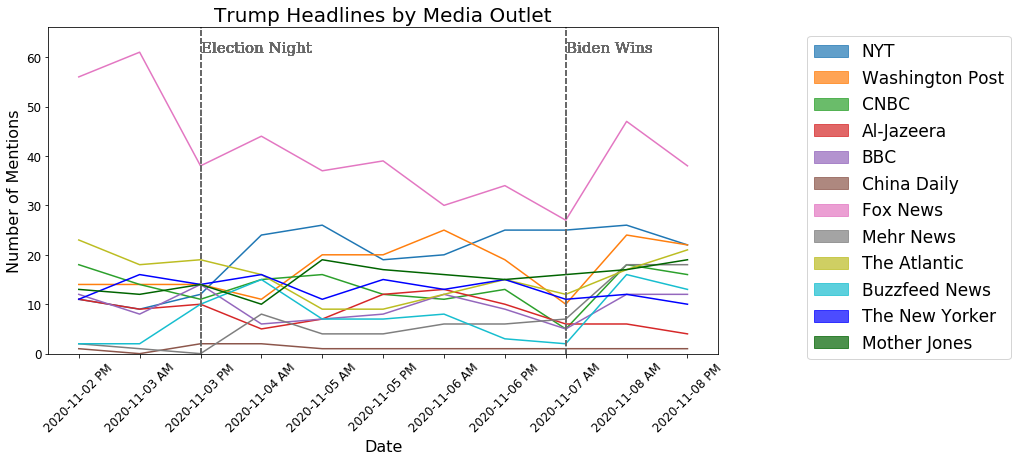

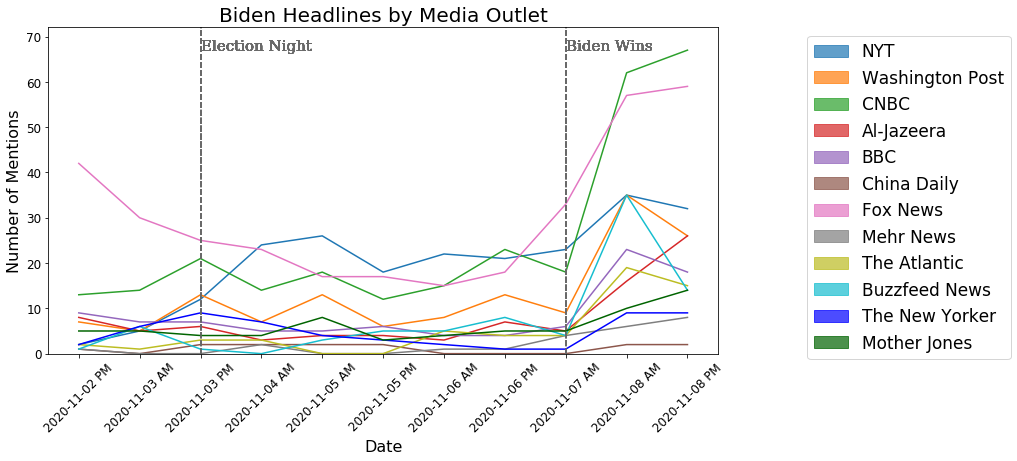

In [42]:
# Plot counts for Trump and Biden
plot_keyword("Trump")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Biden")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()

So news outlets have and continue to write about Donald Trump- no surprise there. Interestingly, there was much less coverage of Biden until after he was announced as the projected winner and nearly every news outlet covered Biden more. Several news outlets only covered Biden briefly, as the drop on the following day demonstrates.

Now let's take a look at how news outlets covered the election itself.

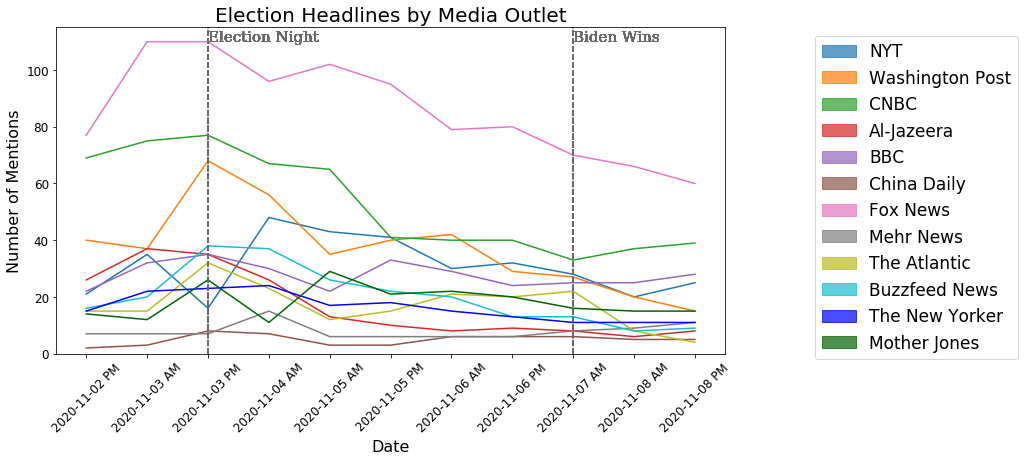

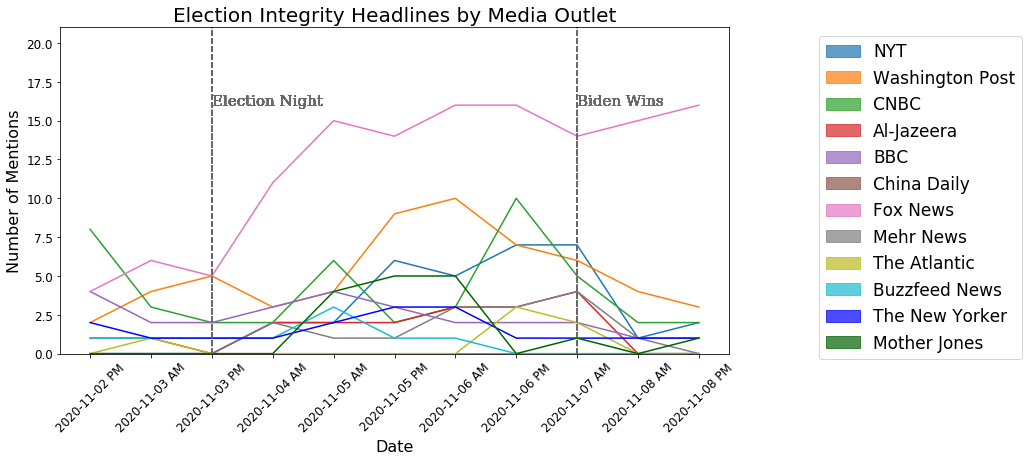

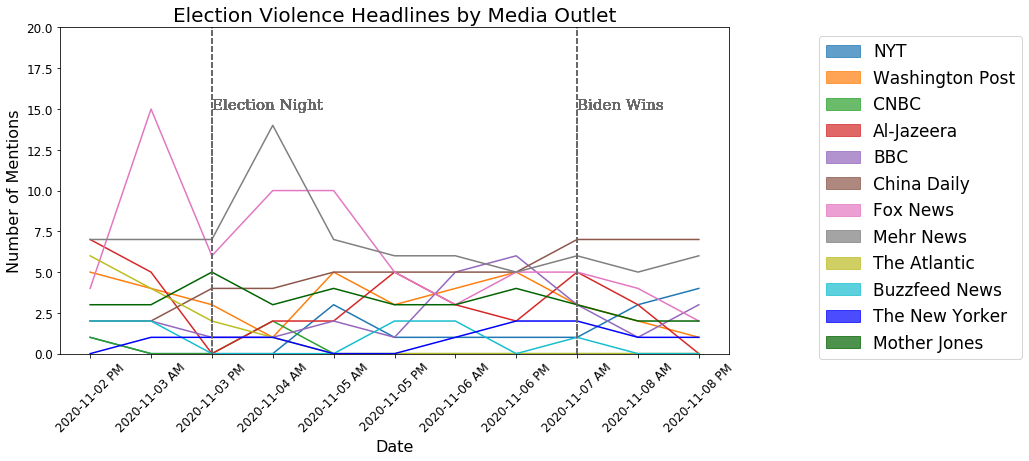

In [43]:
# Plot election related headlines
plot_keyword("Election")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Election Integrity")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Election Violence")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()

More interesting stuff here. First, it looks like general coverage of the election peaked on election night and declined steadily thereafter across all outlets. 

Second, Fox News had many more headlines about the integrity of the election than any other outlet, and their coverage of election integrity really began after election night. This suggests the narrative that the election was illegitimate formed after the inconclusive election night. Some other media outlets, such as the Washington Post, began to cover the integrity of the election several days after election night, although nowhere near as heavily as Fox News did. 

Third, although there were overall few headlines discussing potential election violence and protests, Fox News and Mehr News (an english language Iranian news site) did have some coverage of the issue before and after election night, respectively. Lastly, after Biden was announced victorious, Mehr News and China Daily (an english language Chinese government backed news site) had the most coverage of election violence. As both Iran and China have been known to push disinformation and exaggerate fears within US society, this finding largely makes sense. 

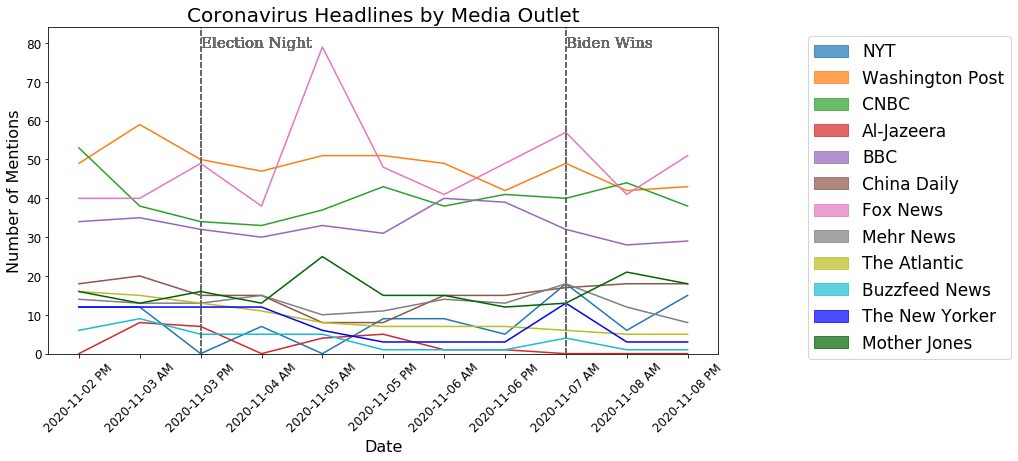

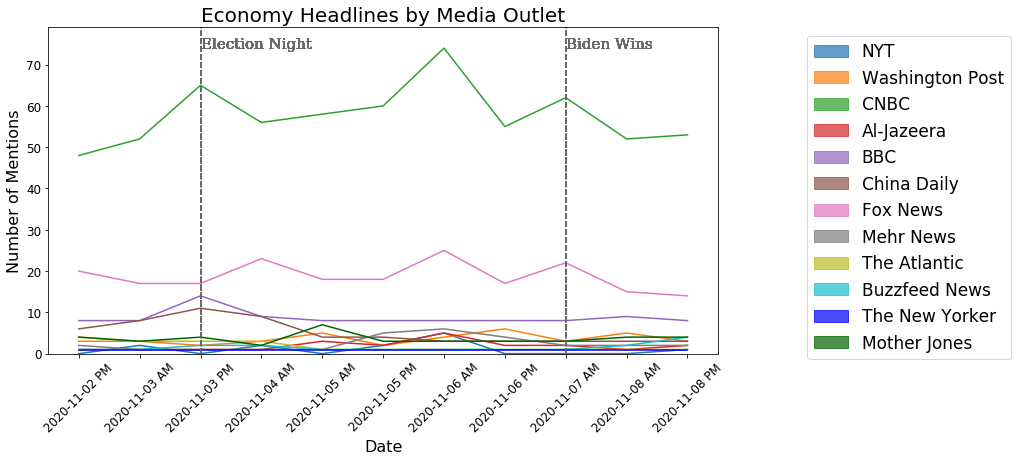

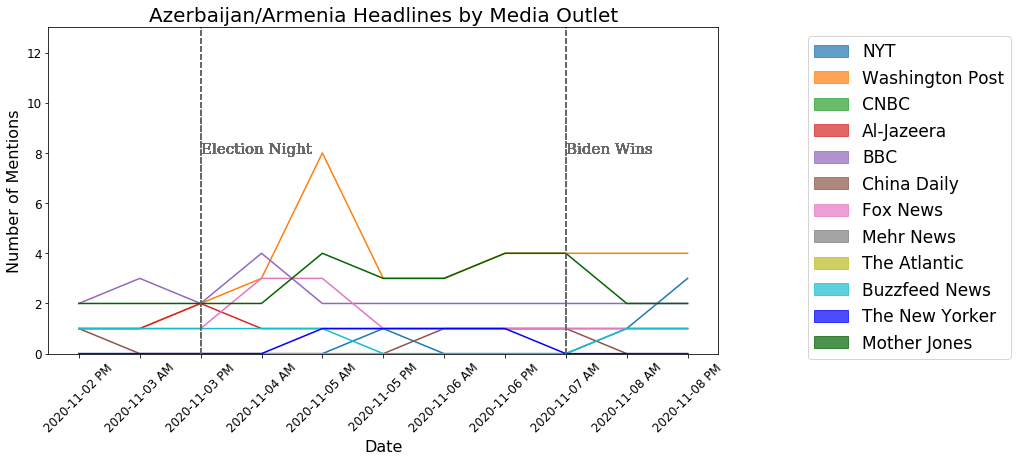

In [44]:
# Now let's look at some of the other stories we want to cover
plot_keyword("Coronavirus")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Economy")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Azerbaijan/Armenia")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()

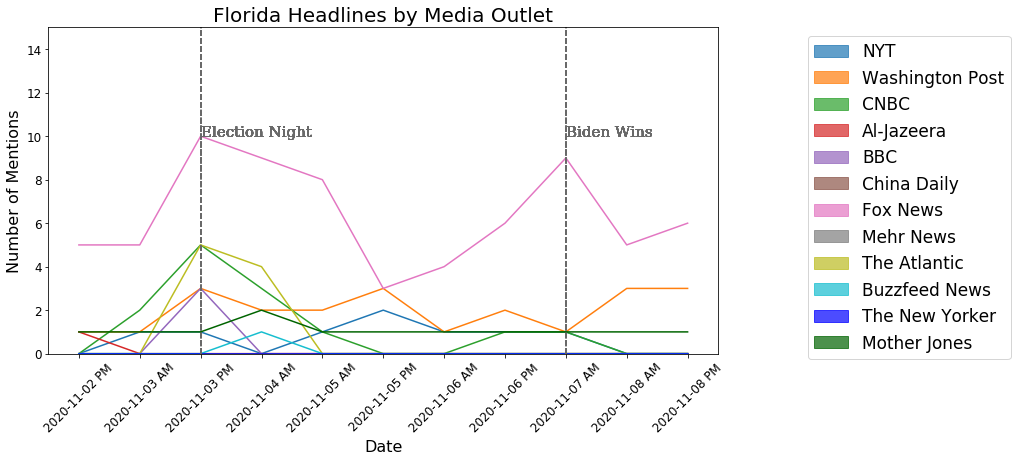

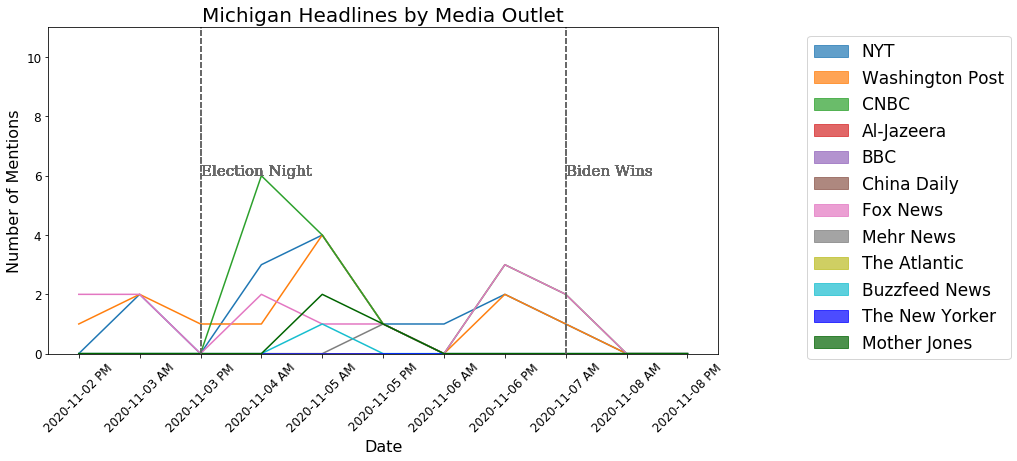

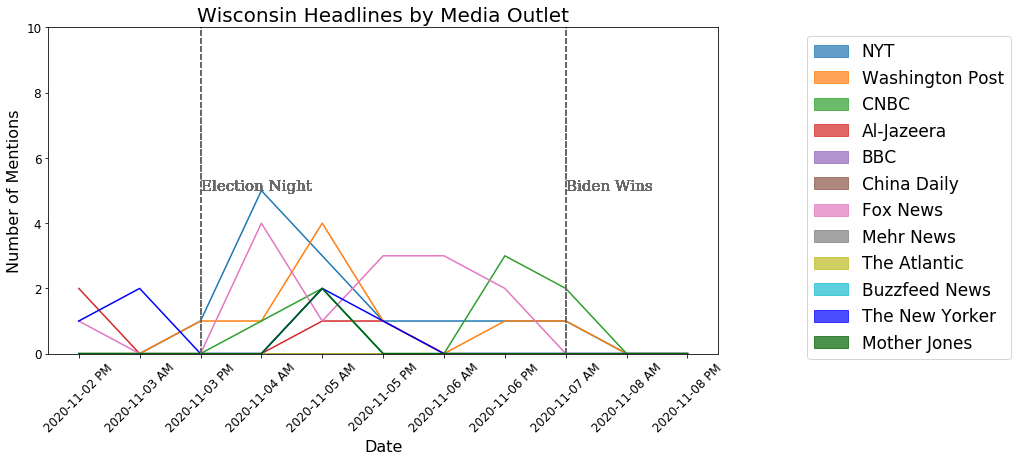

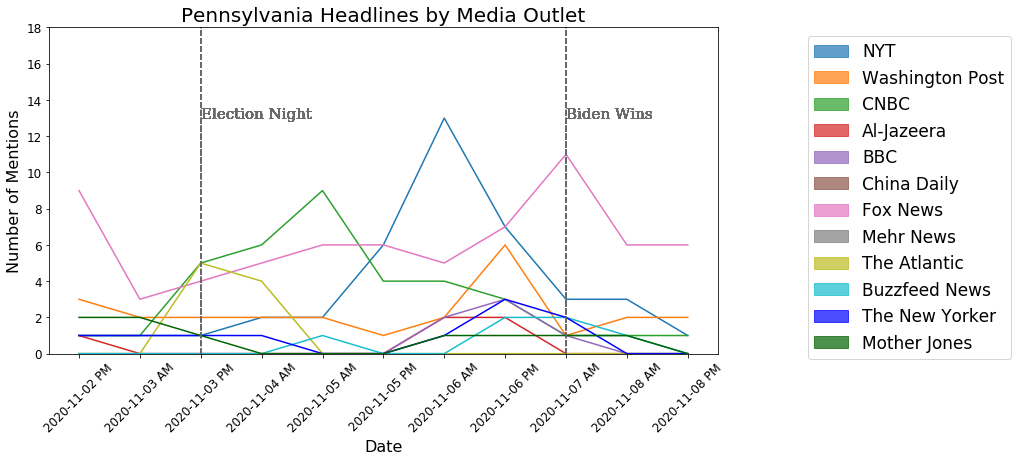

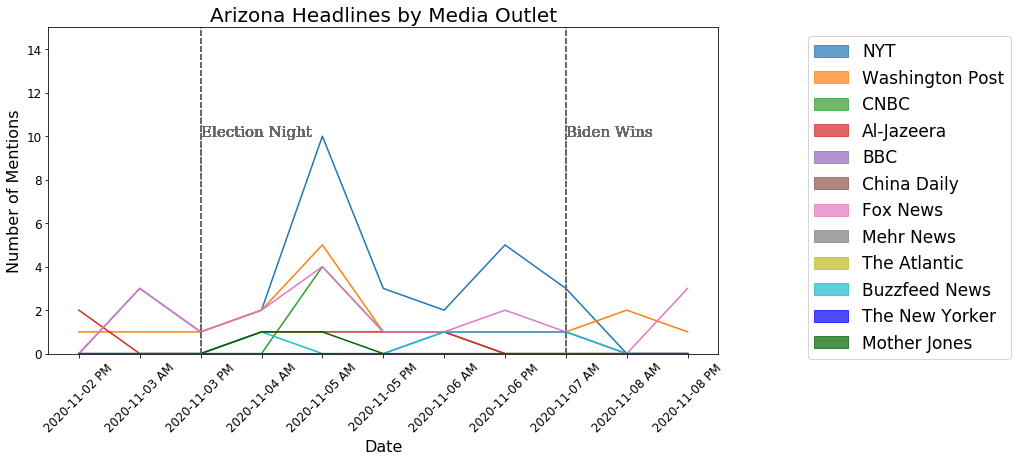

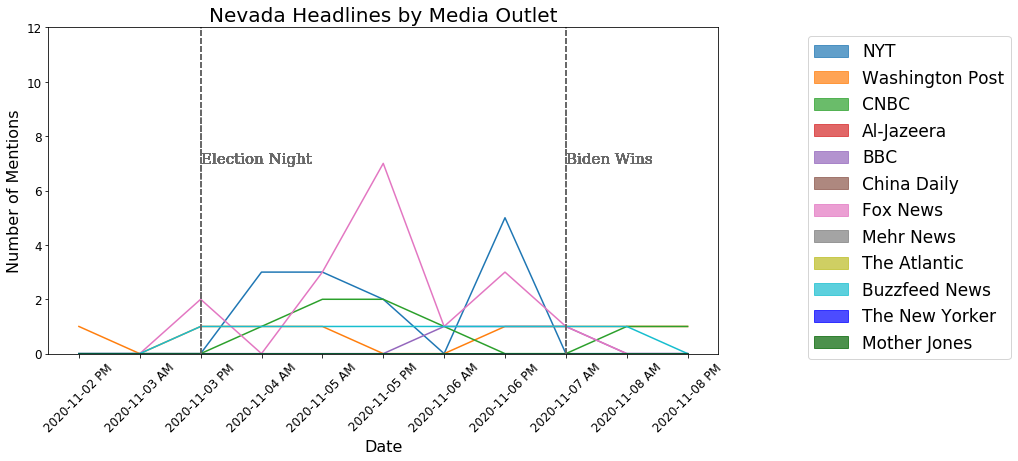

In [45]:
# Now let's plot the five swing states
plot_keyword("Florida")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Michigan")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Wisconsin")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Pennsylvania")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Arizona")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()
plot_keyword("Nevada")
plt.legend(handles=handles_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
plt.show()

Now let's make some comparisons within outlets. 

In [46]:
# Define colors for each keyword to be consistent across graphs
trump_patch = mpatches.Patch(color='tab:blue', label='Trump',alpha=0.7)
biden_patch = mpatches.Patch(color='tab:orange', label='Biden',alpha=0.7)
election_patch = mpatches.Patch(color='tab:green', label='Election',alpha=0.7)
corona_patch = mpatches.Patch(color='tab:red', label='Coronavirus',alpha=0.7)
integrity_patch = mpatches.Patch(color='tab:purple', label='Election Integrity',alpha=0.7)
economy_patch = mpatches.Patch(color='tab:brown', label='Economy',alpha=0.7)
violence_patch = mpatches.Patch(color='tab:pink', label='Election Violence',alpha=0.7)
nk_patch = mpatches.Patch(color='tab:gray', label='Azerbaijan/Armenia',alpha=0.7)
michigan_patch = mpatches.Patch(color='tab:olive', label='Michigan',alpha=0.7)
wisc_patch = mpatches.Patch(color='tab:cyan', label='Wisconsin',alpha=0.7)
penn_patch = mpatches.Patch(color='lightcoral', label='Pennsylvania',alpha=0.7)
az_patch = mpatches.Patch(color='darkgreen', label='Arizona',alpha=0.7)
nevada_patch = mpatches.Patch(color='goldenrod', label='Nevada',alpha=0.7)
florida_patch = mpatches.Patch(color='blue', label='Florida',alpha=0.7)
climate_patch = mpatches.Patch(color="black",label="Climate Change",alpha=0.7)
keywords_list = [trump_patch, biden_patch, election_patch,corona_patch,integrity_patch,
                economy_patch, violence_patch, nk_patch, michigan_patch, wisc_patch,
                penn_patch, az_patch, nevada_patch, florida_patch,climate_patch]
words = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink",
        "tab:gray","tab:olive","tab:cyan","lightcoral","darkgreen","goldenrod","blue","black"]

In [47]:
# Define a plotting function that displays all keywords for each outlet
def plot_source(source):
    plt.figure(figsize=(12,6))# (width,height)
    font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 15,
        }

    for word in range(len(keywords)):
        plt.plot(testdf.columns,testdf.loc[(source,keywords[word])], color=words[word])
        plt.xticks(rotation=45,fontsize=12)
        plt.yticks(fontsize = 12)
        plt.ylabel("Number of Mentions", fontsize = 16)
        plt.xlabel("Date",fontsize=16)
        maxy = testdf.max(level=0).loc[source].max()
        plt.ylim(0,maxy+5)
        plt.axvline(x="2020-11-03 PM",color="dimgray",linestyle="--")
        plt.axvline(x="2020-11-07 AM",color="dimgray",linestyle="--")
        plt.text("2020-11-03 PM",(testdf.max(level=0).loc[source,:].max()),"Election Night",color="dimgray",
                horizontalalignment="left", fontdict=font)
        plt.text("2020-11-07 AM",(testdf.max(level=0).loc[source,:].max()),"Biden Wins",color="dimgray",
                horizontalalignment="left",fontdict=font)
        plt.title("{0} Headlines".format(source),fontsize=20)
        


In [48]:
# Get a list of domestic media outlets
us_sources = ["NYT","WaPo","Fox","CNBC","The Atlantic","Buzzfeed","New Yorker","Mother Jones"]

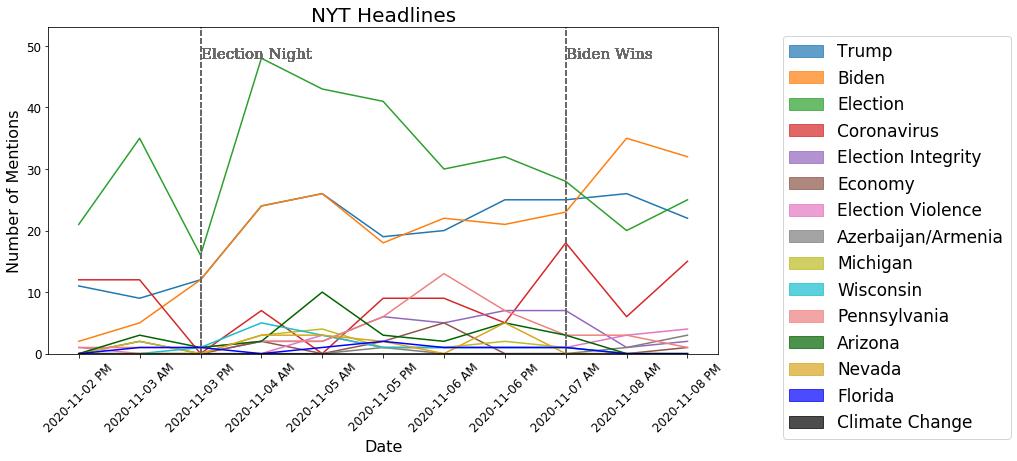

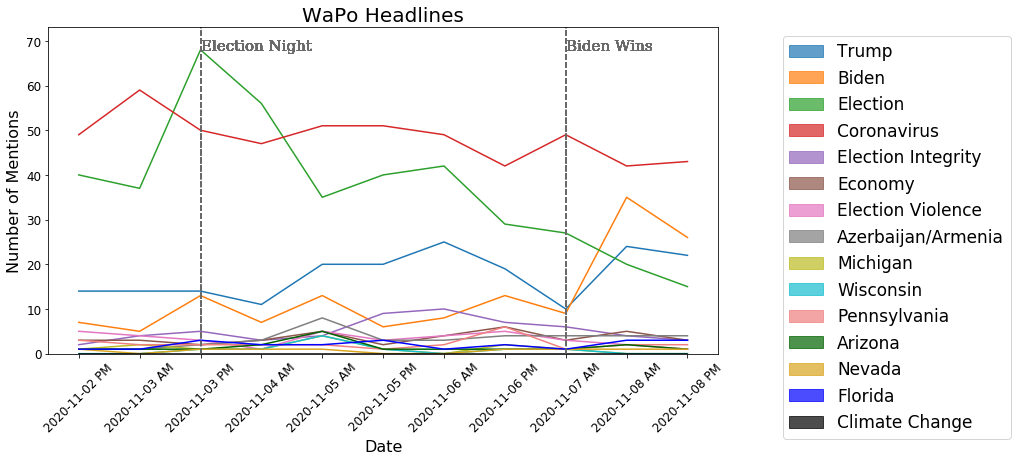

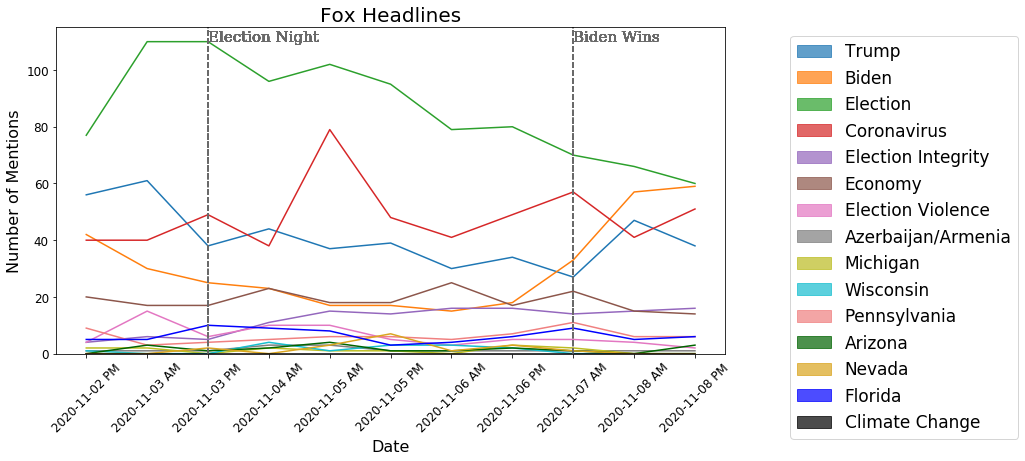

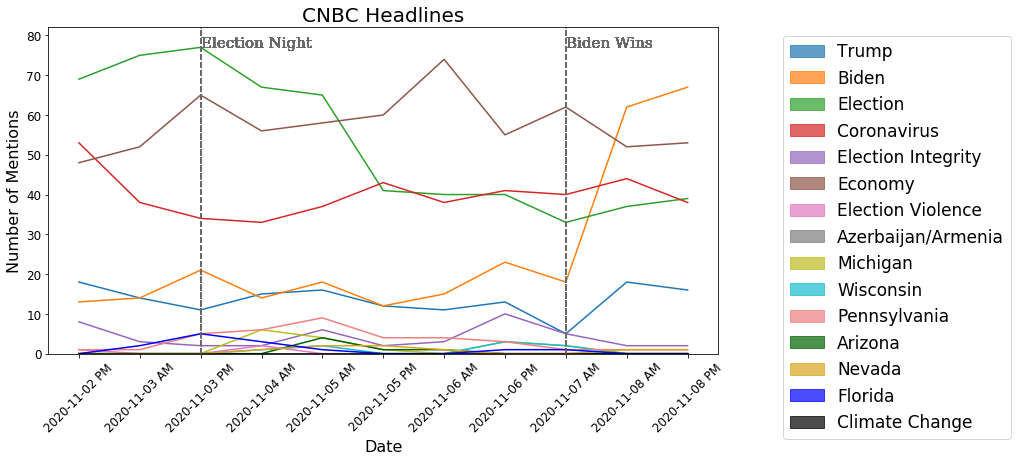

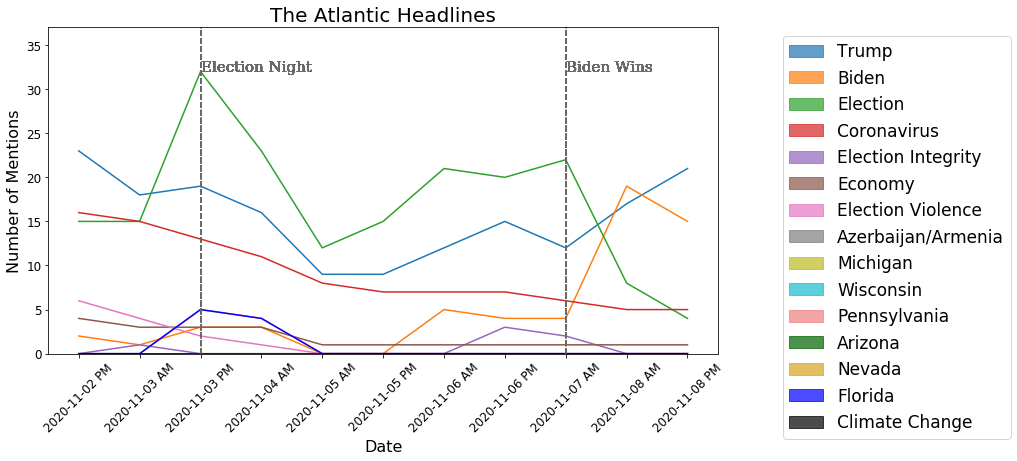

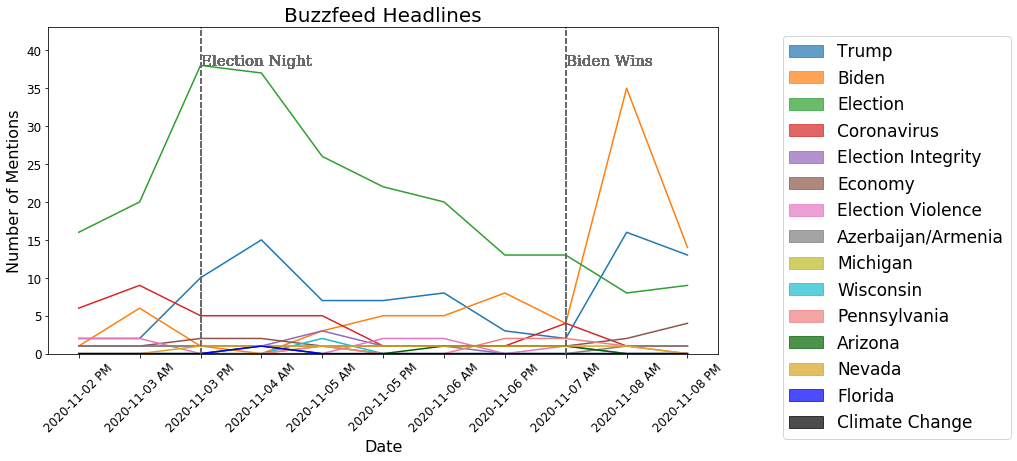

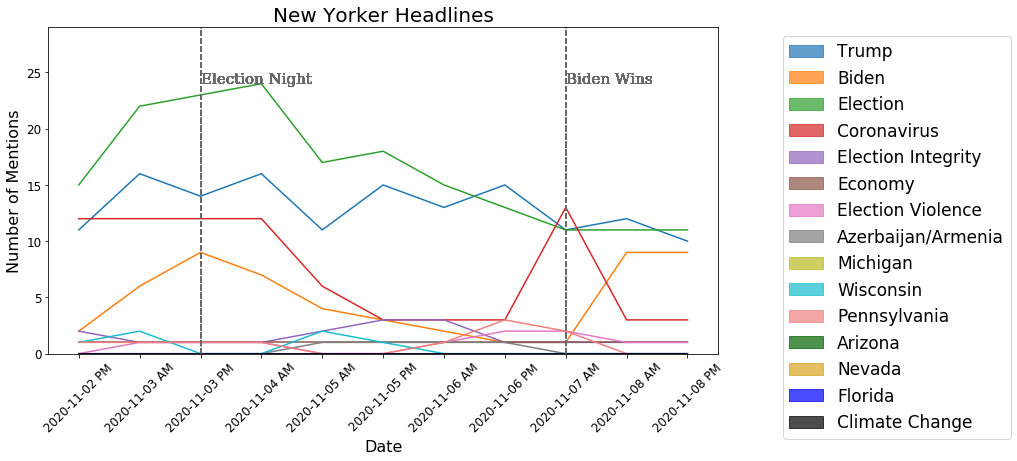

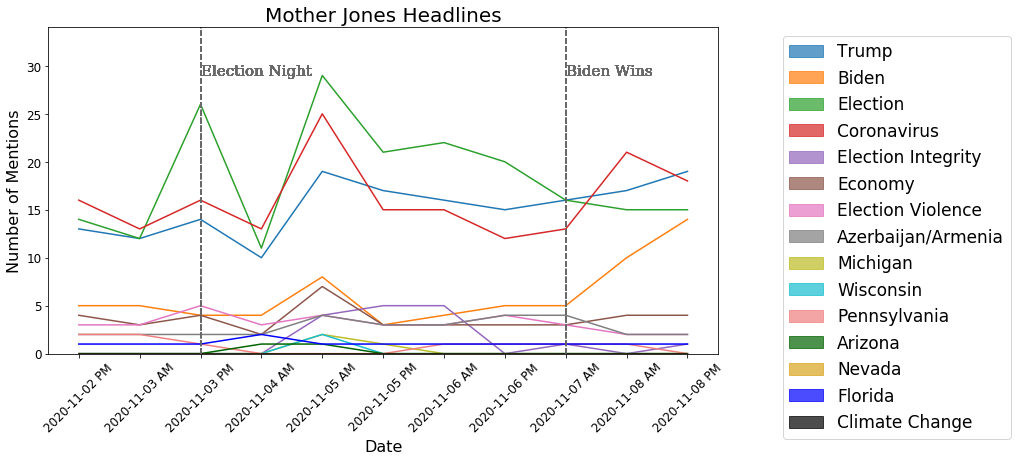

In [49]:
# Plot all domestic media outlets
for outlet in us_sources:
    plot_source(outlet)
    plt.legend(handles=keywords_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
    plt.show()

So, most US news outlets cover the same four stories: the election, Trump, Biden, and coronavirus. However, some outlets such as Fox, The Atlantic, and Mother Jones spend much more space on Trump than Biden. While Fox is a right-wing outlet, The Atlantic is not and Mother Jones is a left-wing outlet, so this is somewhat counterintuitive. Other outlets, like the New York Times, covered Trump and Biden equally until Biden won the election, at which point Biden received more coverage. Interestingly, no media outlet mentioned climate change once over the entire data set. 

This suggests that all major US news outlets generally cover the same stories, although they choose how much space to give to each story. 

In [50]:
# Get a list of foreign media sources
foreign_sources = ["Al-Jazeera","BBC","China Daily","Mehr"]

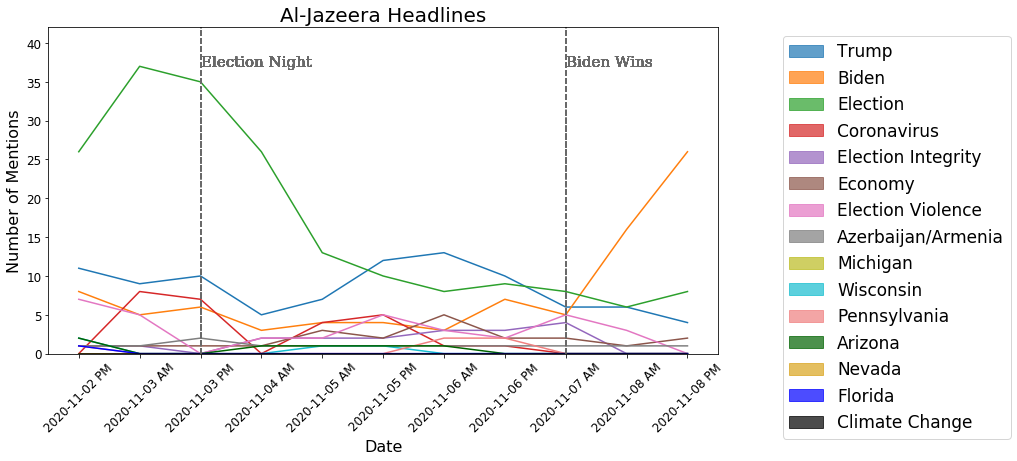

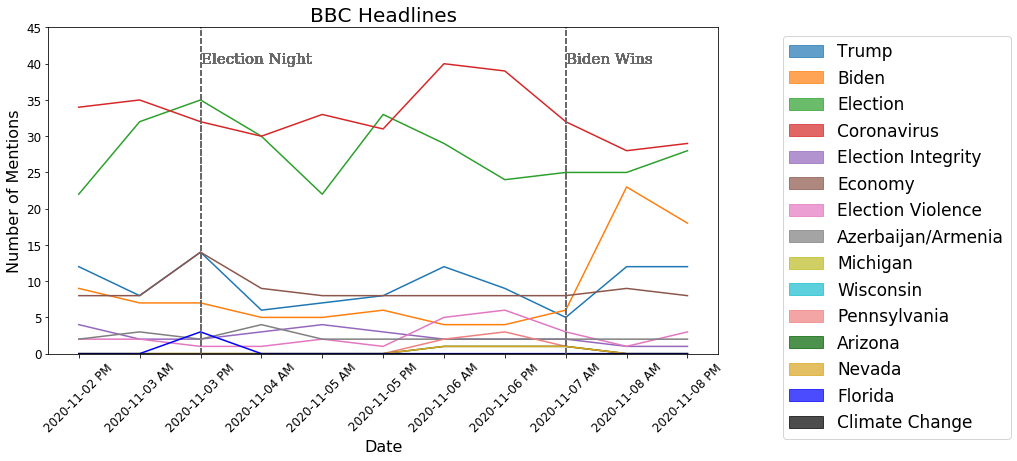

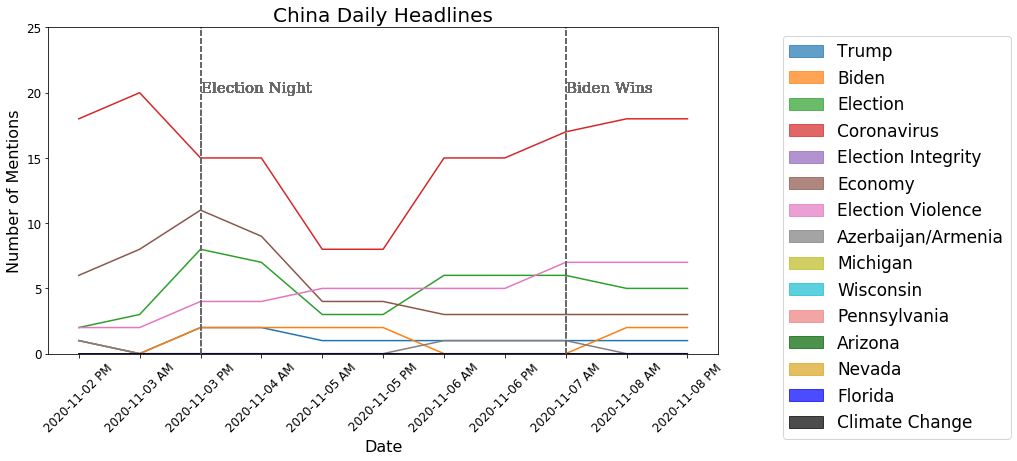

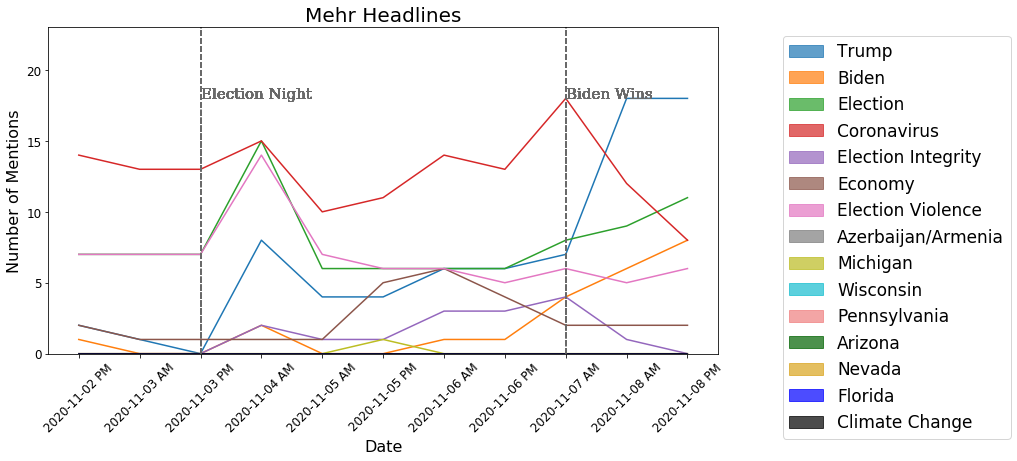

In [51]:
# Now plot all foreign media outlets
for outlet in foreign_sources:
    plot_source(outlet)
    plt.legend(handles=keywords_list,
              bbox_to_anchor=(1.45,1), loc='upper right', ncol=1,fontsize=17)
    plt.show()

Unlike domestic news sources, foreign news sources display more variation in which sources they cover. For instance, Al-Jazeera had many headlines on the election and, after his victory, on Biden. By contrast, China Daily was less interested in the election and more interested in coronavirus and covering the US election in general, while making little note of either Trump or Biden. 

This suggests that, although events in the US are important to the world, foreign media sources are more likely to publish stories they think will connect with their target audience: readers in that country. 

Additionally, we can make inferences about the preferences of foreign countries based on how their media outlets cover certain events. For example, Mehr News increased its coverage of Trump after Biden was announced victorious: these headlines were likely mocking Trump or approving of his loss, as the Trump administration has imposed harsh sanctions on Iran and even threatened military action against the regime. China Daily, on the other hand, spent little space on either Trump or Biden, suggesting that the Chinese government is less concerned with whoever wins the election than Iran.

In conclusion, there is much to be learned from studying media outlets and the topics they choose to cover. Web scraping is an efficient and effective way to do that. 

This project is available at [Github](https://github.com/grahamh39/DATS6103-Project-2-Graham-Hulsey-), Github Pages, and Zenodo. 